<center> <font color=#3498DB><h2>EDA</h2></font>  <h2></h2> </center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
import db_conection

In [3]:
#leer db
query = "select * from candidates_raw"
dataframe_raw = pd.read_sql(sql=query, con = db_conection.conn())

In [4]:
dataframe_raw.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [5]:
# Descripción básica del dataframe
dataframe_raw.info()

# Estadísticas descriptivas
dataframe_raw.describe()

# Revisar valores únicos para cada columna
for column in dataframe_raw.columns:
    print(f"{column}: {dataframe_raw[column].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB
First Name: 3007 unique values
Last Name: 474 unique values
Email: 49833 unique values
Application Date: 1646 unique values
Country: 244 unique values
YOE: 31 unique values
Seniorit

In [6]:
# Verificar si hay valores nulos en el dataframe
print(dataframe_raw.isnull().sum())

# Verificar si hay filas duplicadas
print(f"Duplicated rows: {dataframe_raw.duplicated().sum()}")

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64
Duplicated rows: 0


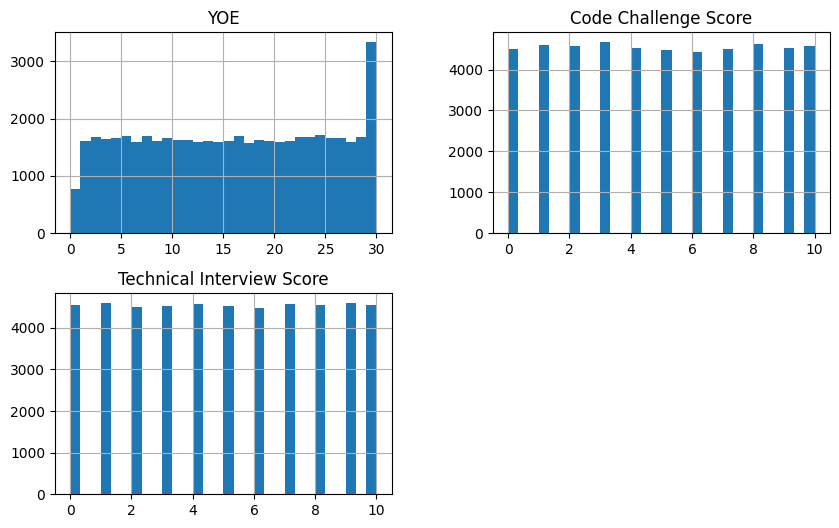

In [7]:
# Visualización de la Distribución de las Variables
dataframe_raw[['YOE', 'Code Challenge Score', 'Technical Interview Score']].hist(bins=30, figsize=(10, 6))
plt.show()

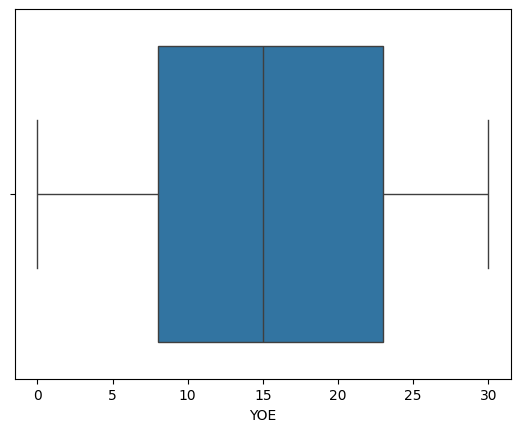

In [8]:
#Ya que hay una gran concentración de candidatos con 30 años de experiencia, se investiga más detalladamente si esos candidatos
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya has cargado tu dataframe:
sns.boxplot(x=dataframe_raw['YOE'])
plt.show()

In [9]:
import numpy as np

# Crear la columna 'hired' basada en la condición de que ambas puntuaciones sean >= 7
dataframe_raw['hired'] = np.where(
    (dataframe_raw['Code Challenge Score'] >= 7) & (dataframe_raw['Technical Interview Score'] >= 7), 
    1, 
    0
)

# Ver las primeras filas del dataframe para verificar la nueva columna
print(dataframe_raw[['Code Challenge Score', 'Technical Interview Score', 'hired']].head())

   Code Challenge Score  Technical Interview Score  hired
0                     3                          3      0
1                     2                         10      0
2                    10                          9      1
3                     7                          1      0
4                     9                          7      1


In [10]:
#cargar los datos en postgres y leer de nuevo

In [11]:
dataframe_raw.to_sql("candidates_hired" ,con = db_conection.conn(), if_exists="replace", index=False) #load into postgres

1000

In [13]:
get_all_data_hired = f"SELECT * FROM candidates_hired" #The query to get the data for the pd dataframe
candidates_hired = pd.read_sql(get_all_data_hired,con = db_conection.conn())

In [14]:
candidates_hired

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1,0
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2,0
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1,0
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0,0


In [16]:
candidates_hired.hired.value_counts()

hired
0    43302
1     6698
Name: count, dtype: int64

Hires by technology (pie chart)
Hires by year (horizontal bar chart)
Hires by seniority (bar chart)
Hires by country over years (USA, Brazil, Colombia and Ecuador only) (multiline chart)

<center> <font color=#3498DB><h2>VISUALIZACIONES</h2></font>  <h2>📊</h2> </center>

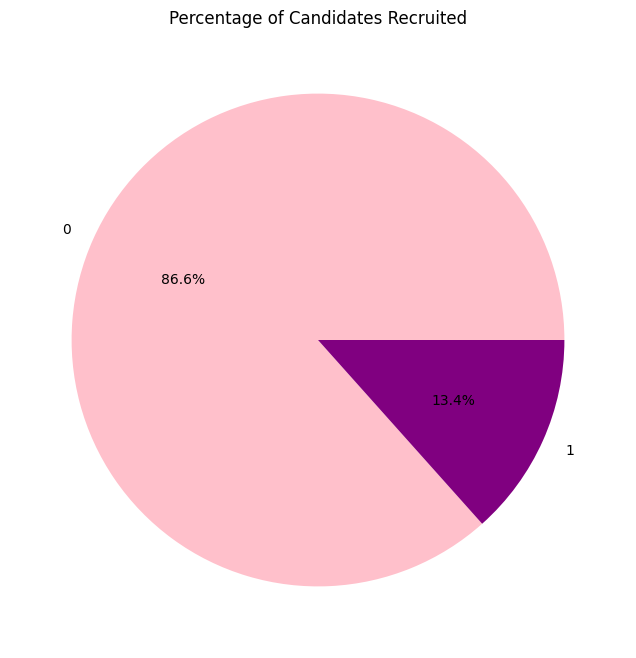

In [18]:
#Hires by technology (pie chart)
Number_of_hires = candidates_hired['hired'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Number_of_hires, labels=Number_of_hires.index, autopct='%1.1f%%', colors=['pink', 'purple'])

plt.title('Percentage of Candidates Recruited')

plt.show()

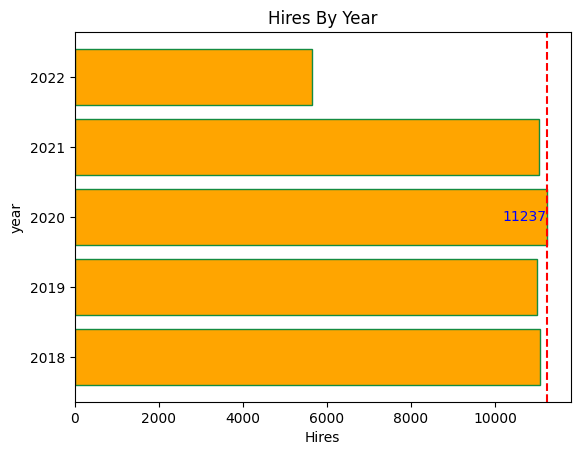

In [20]:
#Hires by year (horizontal bar chart)
hby = pd.to_datetime(candidates_hired["Application Date"],format="%Y-%m-%d")#change the format for extract the year in each register
candidates_hired["Year"] = hby.dt.year #create the column year and set just the year from the column Application Date
hires_by_year = candidates_hired.groupby("Year").size() #group by year and get the unique values from this column
is_hire = candidates_hired[candidates_hired["hired"]==1] #create the dataset when just have the registers where they are hired
hires_by_year_hired = is_hire.groupby("Year").size()


fig, ax = plt.subplots()
max_year = hires_by_year.idxmax()
max_hires = hires_by_year.max()
ax.barh(hires_by_year.index, hires_by_year.values, color="orange", edgecolor="#148B41")
ax.set_ylabel("year")
ax.set_xlabel("Hires")
ax.set_title("Hires By Year")
ax.autoscale()
ax.axvline(max_hires, color='red', linestyle='--')
ax.text(max_hires, max_year, f'{max_hires}', va='center', ha='right', color='blue')
plt.show()

In [ ]:
is_hire = candidates_hired[candidates_hired["Hired"]==1]
hires_by_year_hired = is_hire.groupby("Year").size()

fig, ax = plt.subplots()
max_year_hired = hires_by_year_hired.idxmax()
max_hires_hired = hires_by_year_hired.max()
ax.barh(hires_by_year_hired.index, hires_by_year_hired.values, color="#20E86C", edgecolor="#148B41")
ax.set_ylabel("year")
ax.set_xlabel("Hired")
ax.set_title("Hires By Year hired")
ax.autoscale()
ax.axvline(max_hires_hired, color='red', linestyle='--')
ax.text(max_hires_hired, max_year_hired, f'{max_hires_hired}', va='center', ha='right', color='blue')
plt.show()

In [ ]:
#Hires by seniority (bar chart)
hired_by_seniority = candidates_hired.groupby("Seniority").size()
hired_by_seniority_h = is_hire.groupby("Seniority").size()
hired_by_seniority

fig, ax = plt.subplots()

ax.bar(hired_by_seniority.index, hired_by_seniority.values)
ax.set_title("hires by seniority")
ax.set(xlabel="Seniority category", ylabel="Amount")
ax.grid(True, axis="y", linestyle="--", color="skyblue")
ax.scatter(hired_by_seniority.idxmax(),hired_by_seniority.max(), marker="x", color="black", s=50, label="More applications")
ax.legend(loc="lower center")
plt.show()


fig, ax = plt.subplots()
ax.bar(hired_by_seniority_h.index, hired_by_seniority_h.values, color="#0ED507")
ax.set(xlabel="Seniority", ylabel="Hired amount")
ax.set_title("Hired")
ax.grid(True, axis="y", color="skyblue", linestyle="--")
ax.text(hired_by_seniority_h.idxmax(),hired_by_seniority_h.max()-50,f"{hired_by_seniority_h.max()}", va="center", ha="center")
ax.scatter(x=hired_by_seniority_h.idxmax(), y=hired_by_seniority_h.max()+30, marker="v", color="black", label="Max_hires_by_Seniority")
ax.legend(loc="lower center")
plt.show()

In [ ]:
Hired_by_seniority_counts = candidates_hired[candidates_hired['Hired'] == 'Yes']['Seniority'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Hired_by_seniority_counts, labels=Hired_by_seniority_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Hires by Seniority')
plt.show()

In [ ]:
seniority_categories = candidates_hired['Seniority'].unique()

yoe_averages = []

for category in seniority_categories:
    average_yoe = candidates_hired[candidates_hired['Seniority'] == category]['YOE'].mean()
    yoe_averages.append(average_yoe)

plt.figure(figsize=(10, 6))
bars = plt.bar(seniority_categories, yoe_averages, color= green_yellow_palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Years of Experience by Seniority Category')
plt.xlabel('Seniority Category')
plt.ylabel('Average Years of Experience')
plt.show()

In [ ]:
##Hires by country over years (USA, Brazil, Colombia and Ecuador only) (multiline chart)
countries_list = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

plt.figure(figsize=(10, 6))
for country in countries_list:
    by_country = candidates_hired[candidates_hired['Country'] == country]
    plt.plot(by_country['Year'], by_country['Hires'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Hires')
plt.title('Hires by Country Over Years (USA, Brazil, Colombia, and Ecuador)')
plt.legend()
plt.xticks(candidates_hired['Year'].unique())
plt.grid(True)
plt.show()

In [ ]:
#separeted aplication date 
candidates_hired['ApplicationDate'] = pd.to_datetime(candidates_hired['ApplicationDate'], format='mixed')
candidates_hired['Year'] = candidates_hired['ApplicationDate'].dt.year
candidates_hired['MonthName'] = candidates_hired['ApplicationDate'].dt.month_name()
candidates_hired['Month'] = candidates_hired['ApplicationDate'].dt.month


candidates_hired['Year'].value_counts()['Year'].value_counts()